# Group Assignment: Titanic EDA
Name: 

In this assignment, you will work in groups to explore the Titanic dataset. Follow the questions below and work together to answer each of them using `pandas`, `matplotlib`, and `seaborn` libraries. Each group is responsible for preparing a presentation summarizing the findings and visualizations.


### Titanic Dataset
https://www.kaggle.com/datasets/yasserh/titanic-dataset

## The Titanic dataset is one of the most well-known datasets for data analysis and machine learning. It provides detailed information about the passengers aboard the Titanic ship, which tragically sank during its maiden voyage in 1912. The dataset is often used to understand how different features such as gender, age, passenger class, and fare influenced a passenger's likelihood of survival. The key features in the dataset include:
### Q0. Get the informations from Kaggle
- PassengerId: Number of passangers 891
- Survived: 0 indicates did not survive, 1 indicates survival
- Pclass: Classification of ticket for each passenger(1st class)
- Name: Gives the name of each passenger
- Sex: Male or female
- Age: The age of the passenger
- SibSp: Number of spouses or siblings on board
- Parch: Number of parents or children onboard
- Ticket: Number of ticket
- Fare: How much the passengers paid
- Cabin: Location of each passengers cabin 
- Embarked: Port from which the passenger embarked

### Import Libraries and Load the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Titanic-Dataset.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S


### Q1: What are the columns present in the dataset?

Hint: Use a pandas function to list the columns.

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Q2: What is the structure of the dataset, and what are the datatypes of the columns?
Hint: Use the .info() method in pandas.

In [3]:
data.info()
#The structure of the dataset is a pandas dataframe with 12 columns. the datatypes of the columns are either
#integers, floating point numbers, or strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q3: Provide a summary of the numerical data.
Hint: Use the .describe() function.

In [4]:
data.describe()
#One factor of this dataset I noticed is that the only column with missing data values is 'Age'.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q4: Drop PassengerId, Name, Ticket, Cabin, Embarked. Why are we dropping the columns?
Hint: Use .drop() and axis=1

In [5]:
data = data.drop("PassengerId", axis = 1)
data = data.drop("Name", axis = 1)
data = data.drop("Ticket", axis = 1)
data = data.drop("Cabin", axis = 1)
data = data.drop("Embarked", axis = 1)

In [6]:
data.sample()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
367,1,3,female,NaN,0,0,7.2292


In [7]:
data.info()
#I think that we are dropping these specific columns because they are all object data types. These data columns are not telling as to a passenger survived.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


### Q5: Which columns have missing values, and how many?
Hint: Use .isnull().sum().

In [8]:
data.isnull().sum()
# age column is missing 177 values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

### Q6: How can you handle missing values in the 'Age' column?
Hint: Fill missing values with either the mean, median, or mode.

In [9]:
inputation_dict = {"Age" : data['Age'].mean()
                  }

In [10]:
new_data = data.fillna(value=inputation_dict)
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Q7: What is the survival rate of passengers by gender?
Hint: Use groupby() on the "Sex" column and calculate the mean of the "Survived" column.

In [11]:
survival_by_gender = new_data.groupby('Sex')['Survived'].mean()
survival_by_gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Fare Distribution')

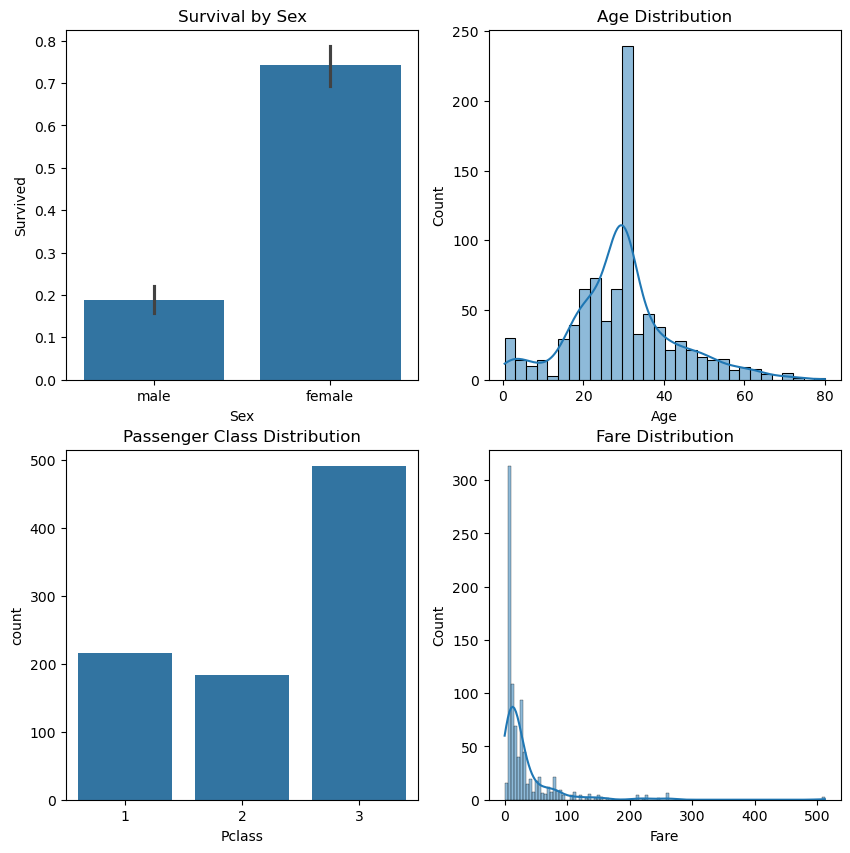

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))



# First plot - Bar plot for 'sex' column

sns.barplot(x='Sex', y='Survived', data=new_data, ax=axes[0, 0])

axes[0, 0].set_title('Survival by Sex')



# Second plot - Histogram for 'age' column

sns.histplot(new_data['Age'], kde=True, ax=axes[0, 1])

axes[0, 1].set_title('Age Distribution')



# Third plot - Count plot for 'class' column

sns.countplot(x='Pclass', data=new_data, ax=axes[1, 0])

axes[1, 0].set_title('Passenger Class Distribution')



# Fourth plot - Histogram for 'fare' column

sns.histplot(new_data['Fare'], kde=True, ax=axes[1, 1])

axes[1, 1].set_title('Fare Distribution')

### Q8: Create a bar plot of the survival rate by gender.
Hint: Use seaborn.barplot().

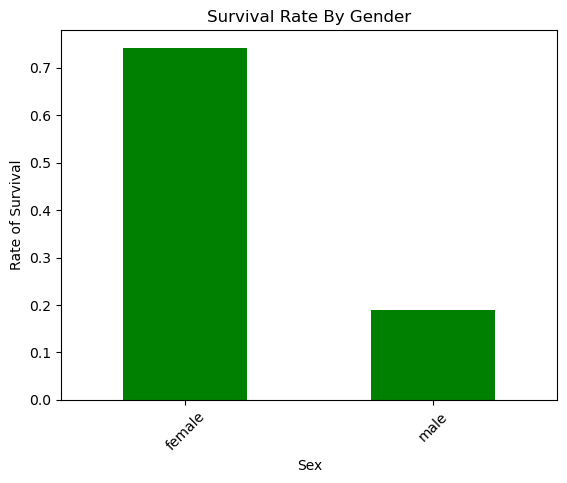

In [13]:
survival_by_gender.plot(kind='bar',  color = 'green')

plt.ylabel("Rate of Survival")
plt.title('Survival Rate By Gender')
plt.xticks(rotation=45)
plt.show()

### Q9: How many passengers were in each class (Pclass)?
Hint: Use .value_counts() on the "Pclass" column.

In [14]:
new_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Q10: What is the survival rate for each passenger class?
Hint: Group by "Pclass" and calculate the mean of "Survived".

In [15]:
survival_by_Pclass = new_data.groupby('Pclass')['Survived'].mean()
survival_by_Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Q11: Create a bar plot of survival rates by passenger class.
Hint: Use seaborn.barplot().

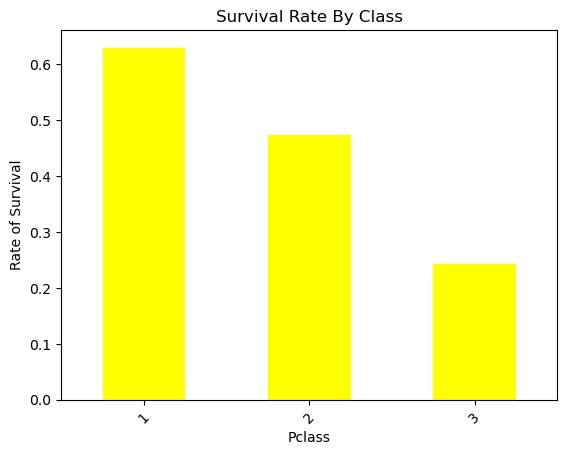

In [16]:
survival_by_Pclass.plot(kind = 'bar', color='yellow')

plt.ylabel("Rate of Survival")
plt.title('Survival Rate By Class')
plt.xticks(rotation=45)
plt.show()

### Q12: Plot the distribution of the 'Age' column.
Hint: Use seaborn.histplot() to plot a histogram.

<Axes: xlabel='Age', ylabel='Count'>

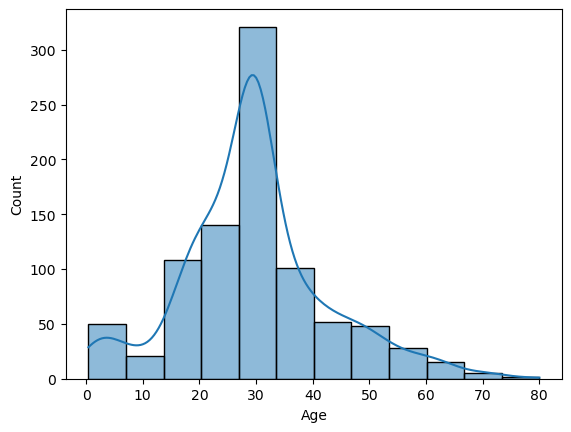

In [22]:
sns.histplot(new_data['Age'], bins=12, kde=True)

### Q13: Create a box plot comparing survival by age.
Hint: Use seaborn.boxplot() to compare the distribution of age for survivors and non-survivors.

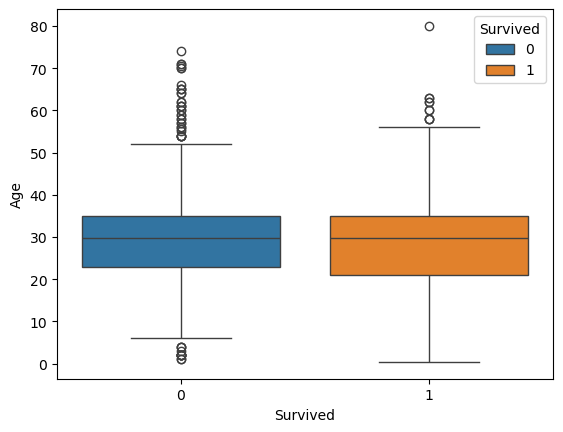

In [18]:
sns.boxplot(x = new_data['Survived'], y = new_data['Age'], hue=data['Survived'])
plt.show()

### Q14: Plot the distribution of the 'Fare' column.
Hint: Use seaborn.histplot().

<Axes: xlabel='Fare', ylabel='Count'>

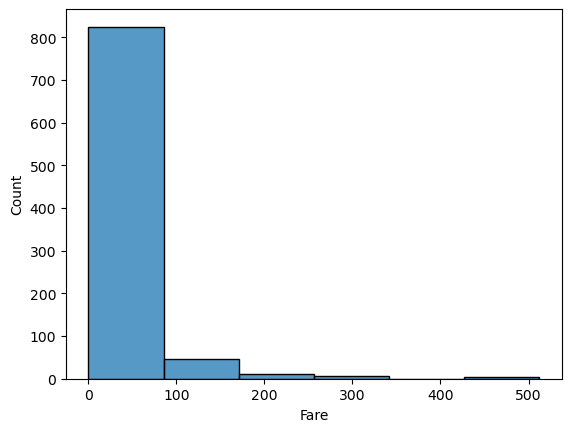

In [19]:
sns.histplot(new_data['Fare'], bins = 6)

### Q15: What are the correlations between the numerical columns? Any pattern?
Hint: Use the .select_dtypes('number') and .corr() function and visualize the result with a heatmap.

In [20]:
#new_data.dtypes

correlation_matrix = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

<Axes: >

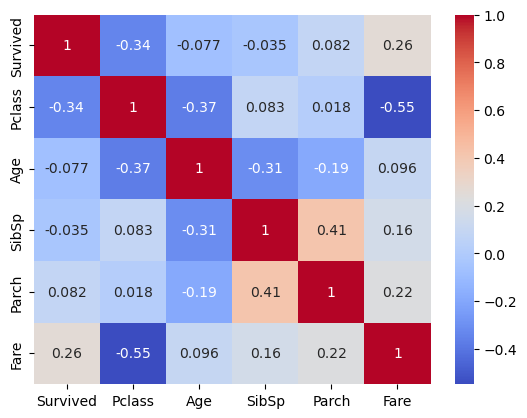

In [21]:
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')

### Q16: Does having siblings or spouses aboard affect survival chances?
Hint: Group by the "SibSp" and Survived column.

In [27]:
new_data.groupby('SibSp')['Survived'].mean()
#I infer that having more than one sibling negetively affects chances of survival. 

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

### Q17: Create a scatter plot showing the relationship between fare and survival.
Hint: Use seaborn.scatterplot().

<Axes: xlabel='Survived', ylabel='Fare'>

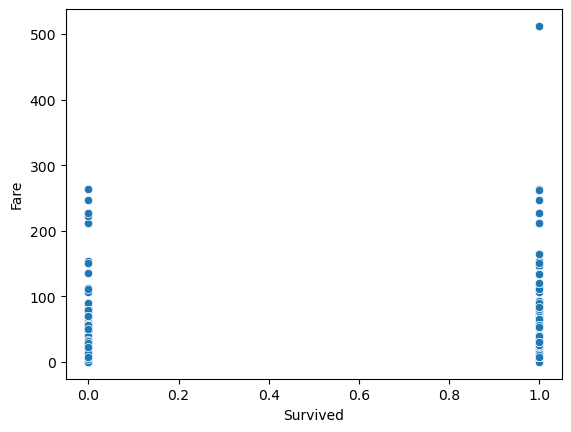

In [32]:
fare_and_survival = sns.scatterplot(x=new_data['Survived'],y=new_data['Fare'])
fare_and_survival

### Q18: Create a pie chart showing the distribution of passengers by class (Pclass).

Hint: Use matplotlib.pie() to create the pie chart.

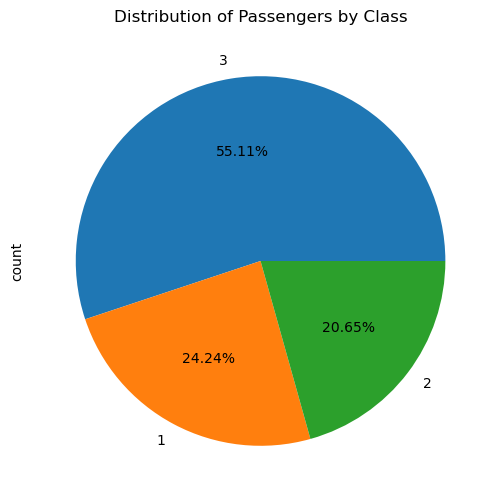

In [44]:
new_data['Pclass'].value_counts().sort_values(ascending=False)\
.plot(kind='pie', figsize=(8,6), title="Distribution of Passengers by Class", autopct='%1.2f%%')


plt.show()

### Q19: Plot a line graph showing how the fare varies with the age of the passengers.

Hint: Use seaborn.lineplot() to plot the line graph.

<Axes: xlabel='Age', ylabel='Fare'>

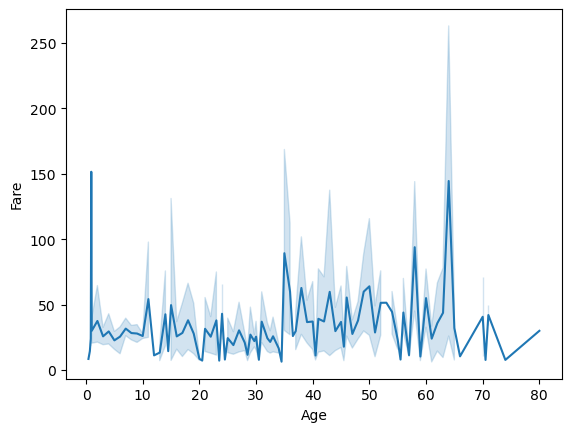

In [49]:
sns.lineplot(x=new_data['Age'], y=new_data['Fare'])

### Q20. Create a pairplot of the numerical features (Age, Fare, SibSp, Parch) in the dataset to explore the relationships between them.

Hint: Use seaborn.pairplot() to plot pairwise relationships.

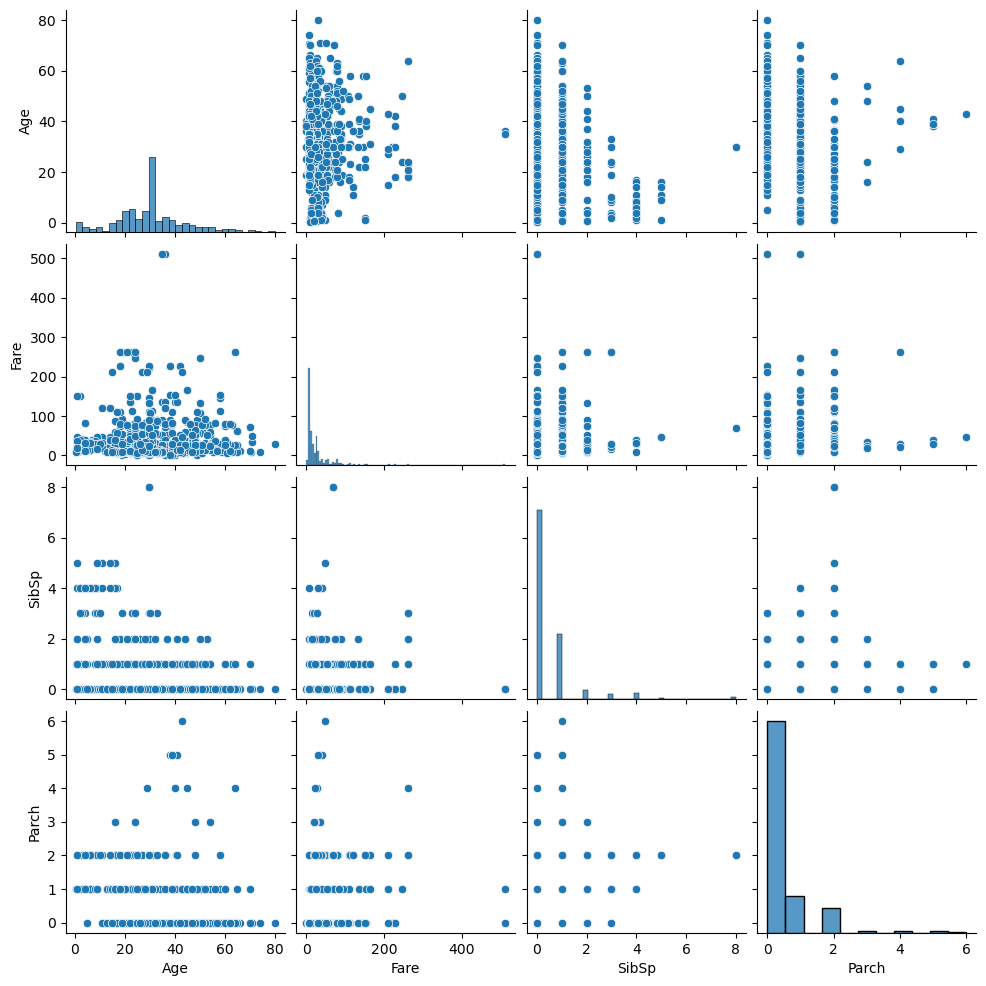

In [51]:
sns.pairplot(new_data[['Age', 'Fare', 'SibSp', 'Parch']])

## Summary:  Based on the visualizations you have created so far (bar plots, histograms, scatter plots, etc.), analyze which features (such as 'Pclass', 'Sex', 'Age', and 'Fare') seem to influence the survival of passengers. What patterns can you identify from these visualizations, and which plot provided the clearest insight?

Based on the resutls from comparing survival rate by gender (Q8), there is a strong correlation between females more likely surviving than men. In addition, comparing survival rate to passenger class(Q11, Q18), passengers in firt class were substaitially more likely to survive than those in second and third class. Survival of second class compared to third class was similar, but second class passengers survived at a slightly higher rate. Passengers who were younger were slightly more likely to survive than older passengers (Q13). The survival of passengers minimally correlated with fare paid (Q15). I believe that a combination of all of these factors helped determine the survival of each passenger.